In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/dogs-vs-cats-redux-kernels-edition.zip'
!unzip 'test.zip'
!unzip 'train.zip'

!mkdir train/{dog,cat}
!find train -maxdepth 1 -type f | grep 'dog' | xargs -I{} mv {} train/dog
!find train -maxdepth 1 -type f | grep 'cat' | xargs -I{} mv {} train/cat

!mkdir test/images
!find test -maxdepth 1 -type f | xargs -I{} mv {} test/images

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [5]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import pathlib

In [4]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [5]:
train_dir = './train'
total_train = len(os.listdir('./train/dog')) + len(os.listdir('./train/cat'))
total_test = len(os.listdir('./test/images/'))
validation_split = 0.2

batch_size = 128
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [6]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           validation_split=validation_split)

train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                           batch_size=batch_size,
                                                           shuffle=True,
                                                           subset='training')
val_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                           batch_size=batch_size,
                                                           shuffle=True,
                                                           subset='validation')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


**CNN FROM SCRATCH**

In [ ]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(128, 3, padding='same', activation='relu'),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),
    #Dropout(0.5),
    Dense(256, activation='relu'),
    #Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
    steps_per_epoch=(total_train * (1 - validation_split) // batch_size),
    validation_steps=(total_train * validation_split // batch_size)
)

Epoch 1/10
156/156 [==============================] - 58s 357ms/step - loss: 0.6792 - accuracy: 0.5541 - val_loss: 0.6835 - val_accuracy: 0.5365
Epoch 2/10
156/156 [==============================] - 56s 357ms/step - loss: 0.6275 - accuracy: 0.6290 - val_loss: 0.5625 - val_accuracy: 0.6925
Epoch 3/10
156/156 [==============================] - 55s 350ms/step - loss: 0.5480 - accuracy: 0.7177 - val_loss: 0.4966 - val_accuracy: 0.7582
Epoch 4/10
156/156 [==============================] - 55s 349ms/step - loss: 0.4701 - accuracy: 0.7740 - val_loss: 0.4761 - val_accuracy: 0.7706
Epoch 5/10
156/156 [==============================] - 56s 358ms/step - loss: 0.4114 - accuracy: 0.8105 - val_loss: 0.4140 - val_accuracy: 0.8123
Epoch 6/10
156/156 [==============================] - 55s 351ms/step - loss: 0.3326 - accuracy: 0.8552 - val_loss: 0.3888 - val_accuracy: 0.8277
Epoch 7/10
156/156 [==============================] - 55s 352ms/step - loss: 0.2608 - accuracy: 0.8904 - val_loss: 0.4469 - val_ac

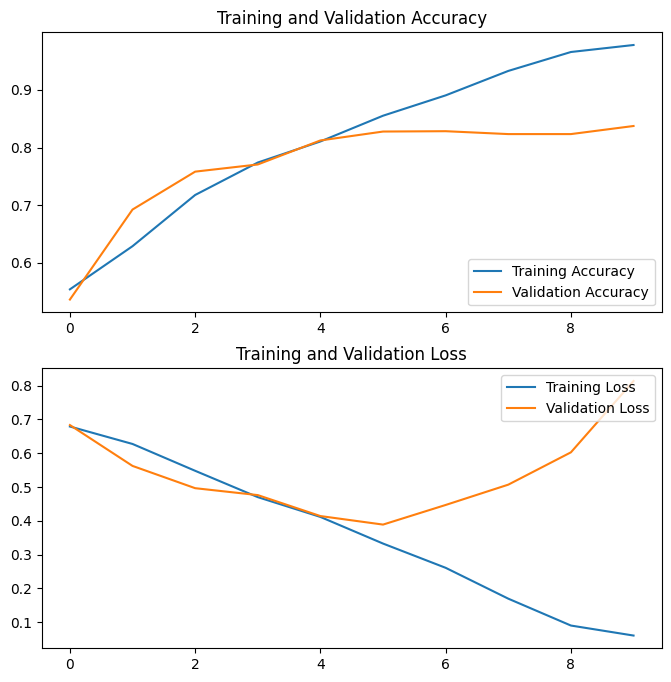

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**DATA AUGMENTATION**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming the variables `validation_split`, `train_dir`, `IMG_HEIGHT`, `IMG_WIDTH`, and `batch_size` are already defined.

train_image_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=validation_split,
    rotation_range=40, # Random rotation between 0 and 40 degrees
    width_shift_range=0.2, # Fraction of total width, for horizontal shift
    height_shift_range=0.2, # Fraction of total height, for vertical shift
    shear_range=0.2, # Shear angle in counter-clockwise direction
    zoom_range=0.2, # Range for random zoom
    horizontal_flip=True, # Randomly flip inputs horizontally
    fill_mode='nearest' # Strategy for filling in newly created pixels
)

train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    batch_size=batch_size,
    shuffle=True,
    subset='training'
)

val_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    batch_size=batch_size,
    shuffle=True,
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(128, 3, padding='same', activation='relu'),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),
    #Dropout(0.5),
    Dense(256, activation='relu'),
    #Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
    steps_per_epoch=(total_train * (1 - validation_split) // batch_size),
    validation_steps=(total_train * validation_split // batch_size)
)

Epoch 1/10
156/156 [==============================] - 199s 1s/step - loss: 0.6976 - accuracy: 0.5264 - val_loss: 0.6863 - val_accuracy: 0.5659
Epoch 2/10
156/156 [==============================] - 183s 1s/step - loss: 0.6796 - accuracy: 0.5705 - val_loss: 0.6674 - val_accuracy: 0.5827
Epoch 3/10
156/156 [==============================] - 190s 1s/step - loss: 0.6759 - accuracy: 0.5787 - val_loss: 0.6801 - val_accuracy: 0.5803
Epoch 4/10
156/156 [==============================] - 182s 1s/step - loss: 0.6601 - accuracy: 0.6019 - val_loss: 0.6358 - val_accuracy: 0.6338
Epoch 5/10
156/156 [==============================] - 182s 1s/step - loss: 0.6334 - accuracy: 0.6426 - val_loss: 0.6431 - val_accuracy: 0.6176
Epoch 6/10
156/156 [==============================] - 183s 1s/step - loss: 0.6061 - accuracy: 0.6639 - val_loss: 0.6085 - val_accuracy: 0.6550
Epoch 7/10
156/156 [==============================] - 185s 1s/step - loss: 0.5692 - accuracy: 0.7037 - val_loss: 0.5493 - val_accuracy: 0.7161

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [7]:
pip install torch torchvision


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 967.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.4 MB/s eta 0:00:00


**RESNET50**

In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

In [6]:
# Load the ResNet50 model pretrained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of ResNet
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Add a global spatial average pooling layer
x = Dense(1024, activation='relu')(x)  # Add a fully-connected layer
predictions = Dense(1, activation='sigmoid')(x)  # Add a logistic layer for binary classification

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'train',  # This is the target directory
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=32,
        class_mode='binary')  # Since we use binary_crossentropy loss, we need binary labels

validation_generator = validation_datagen.flow_from_directory(
        'test',  # This is the directory for validation data
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')


Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [7]:
# Train the model and save the history
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # The number of images to process before declaring one epoch finished.
    epochs=5,
    validation_data=validation_generator,
    validation_steps=50)  # The number of images to process before declaring the validation step finished.


Epoch 1/5
100/100 [==============================] - 32s 230ms/step - loss: 0.7451 - accuracy: 0.5703 - val_loss: 0.9761 - val_accuracy: 0.2537
Epoch 2/5
100/100 [==============================] - 18s 179ms/step - loss: 0.6821 - accuracy: 0.5771 - val_loss: 0.6963 - val_accuracy: 0.6456
Epoch 3/5
100/100 [==============================] - 22s 218ms/step - loss: 0.6659 - accuracy: 0.6056 - val_loss: 1.4009 - val_accuracy: 0.0012
Epoch 4/5
100/100 [==============================] - 17s 166ms/step - loss: 0.6617 - accuracy: 0.5992 - val_loss: 0.7972 - val_accuracy: 0.5425
Epoch 5/5
100/100 [==============================] - 22s 219ms/step - loss: 0.6432 - accuracy: 0.6281 - val_loss: 0.8377 - val_accuracy: 0.4531


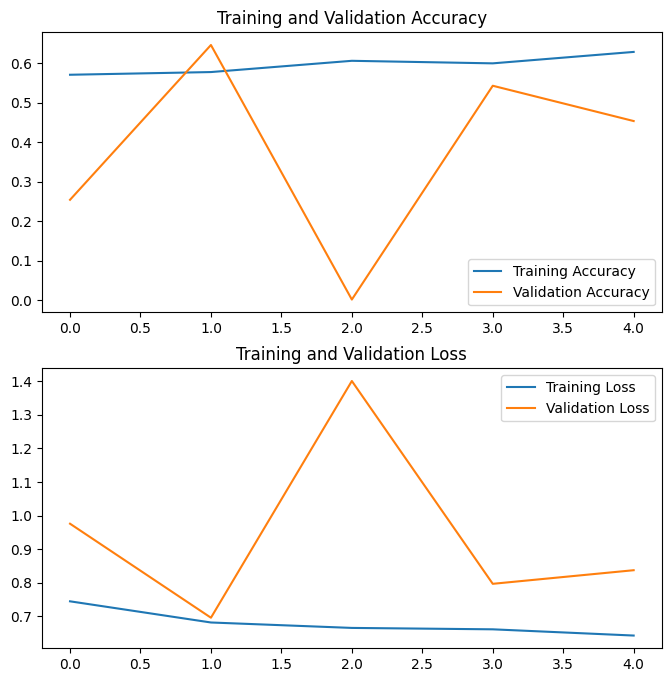

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Finetuning**

In [10]:
base_model.trainable = True

# Refreeze layers except the last 3
for layer in base_model.layers[:-3]:
    layer.trainable = False

In [12]:
# Recompile the model (necessary after making modifications to the `trainable` property)
model.compile(optimizer=Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Continue training (fine-tuning)
history_finetuning = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=5,  # Fine-tune epochs
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/5
100/100 [==============================] - 27s 231ms/step - loss: 0.6832 - accuracy: 0.5800 - val_loss: 0.7645 - val_accuracy: 0.4350
Epoch 2/5
100/100 [==============================] - 17s 170ms/step - loss: 0.6366 - accuracy: 0.6413 - val_loss: 0.5631 - val_accuracy: 0.8081
Epoch 3/5
100/100 [==============================] - 17s 174ms/step - loss: 0.6288 - accuracy: 0.6438 - val_loss: 0.6253 - val_accuracy: 0.7169
Epoch 4/5
100/100 [==============================] - 17s 166ms/step - loss: 0.6341 - accuracy: 0.6434 - val_loss: 0.6203 - val_accuracy: 0.7069
Epoch 5/5
100/100 [==============================] - 21s 215ms/step - loss: 0.6153 - accuracy: 0.6647 - val_loss: 0.5845 - val_accuracy: 0.7394


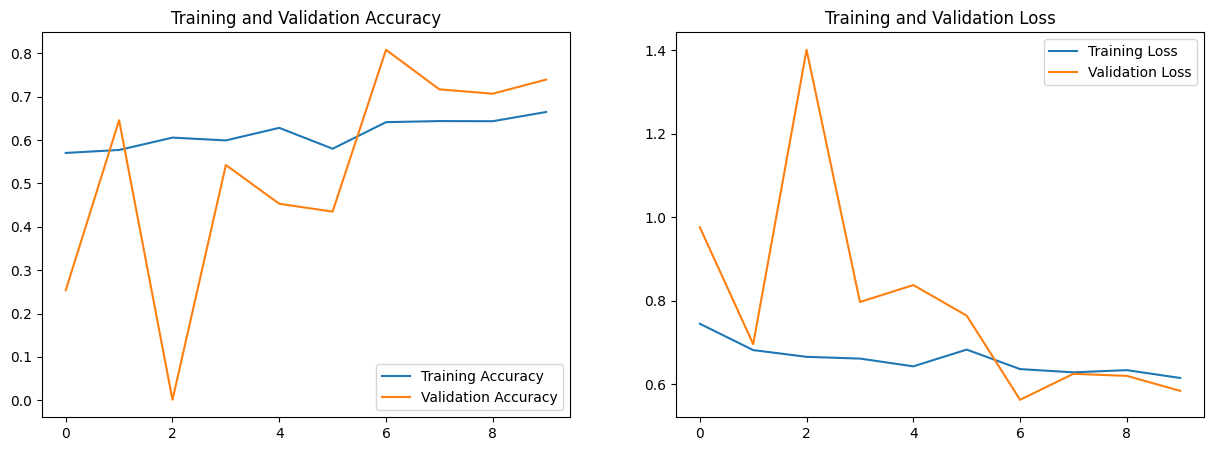

In [16]:
def plot_training_history(history, history_finetuning):
    acc = history.history['accuracy'] + history_finetuning.history['accuracy']
    val_acc = history.history['val_accuracy'] + history_finetuning.history['val_accuracy']
    loss = history.history['loss'] + history_finetuning.history['loss']
    val_loss = history.history['val_loss'] + history_finetuning.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Plot the training history
plot_training_history(history, history_finetuning)